In [ ]:
!nvidia-smi

Fri Jun 30 13:51:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install dlib

In [ ]:
pip install cmake

In [ ]:
pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ce99ed4221692eac50d28738038c267f42aebcd3ca666c4d49e6859f66f22806
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


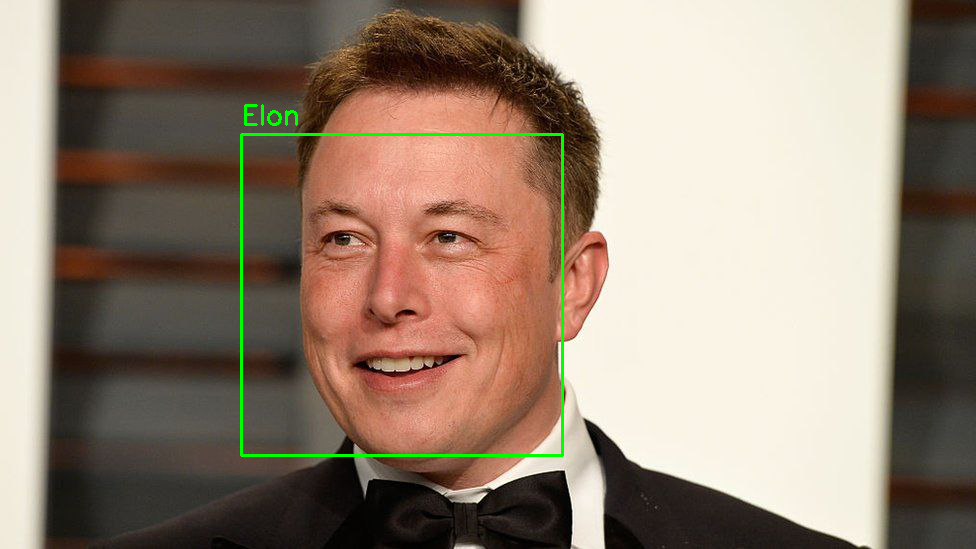

In [ ]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow

# Memuat gambar wajah yang diketahui dan nama labelnya
known_image_path = "/content/Elon.jpg"
known_image = face_recognition.load_image_file(known_image_path)
known_encoding = face_recognition.face_encodings(known_image)[0]
known_name = "Elon"  # Ganti dengan nama label yang sesuai

# Memuat gambar uji
test_image_path = "/content/ElonTest.jpg"
test_image = face_recognition.load_image_file(test_image_path)

# Mendeteksi wajah dalam gambar uji
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

# Menyiapkan array untuk menyimpan nama label wajah terdeteksi
face_labels = []

# Membandingkan wajah terdeteksi dengan wajah yang diketahui
for face_encoding in face_encodings:
    results = face_recognition.compare_faces([known_encoding], face_encoding)
    if results[0]:
        face_labels.append(known_name)
    else:
        face_labels.append("Unknown")

# Menampilkan gambar dengan bounding box dan label nama
for (top, right, bottom, left), label in zip(face_locations, face_labels):
    # Menggambar kotak di sekitar wajah
    cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)

    # Menampilkan label nama di atas kotak
    cv2.putText(test_image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Mengubah mode warna gambar menjadi RGB
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar dengan wajah terdeteksi
cv2_imshow(test_image_rgb)